In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# מעבדה 1 - נתונים סינטטיים

מטרת המעבדה היא לבדוק השפעה של פרמטרי מצלמה ויחסים הדדיים בין זוג מצלמות על התמונות הנרכשות והמודל המשוחזר.

- *במהלך המעבדה נשתמש בקודים מפוטוגרמטריה 1*
- *ניתן לכתוב את הפונקציות ב-Pycharm ולייבא אותן ל-Jupyter במקרה הצורך*

In [5]:

import ImagePair


## חלק א' - Setup

###  בניית עולם וירטואלי

נתחיל מבניית אובייקט שממדיו ומיקומו בעולם ידועים. 



1. צרו מודול בשם ObjectsSynthetic.
2. הוסיפו למודול פונקציה המקבלת ממדים של קוביה ומחזירה את קואורדינטות הקודקודים שלה. הניחו כי מרכז הקוביה נמצא בראשית הצירים (של העולם). 

In [6]:
import ObjectsSynthetic as obj




3. במחלקה PhotoViewer  מפוטוגרמטריה 1 הוסיפו פונקציה 
 המקבלת שמונה פינות של קוביה ומציירת אותה על-ידי חיבור קווים בין הנקודות. 

In [7]:
import PhotoViewer as pv

### בניית מצלמה וירטואלית

השתמשו במחלקה Camera בה השתמשתם בפוטוגרמטריה 1. 
    
א. הוסיפו מאפיין שנקרא sensorSize.  מאפיין זה יתאר את גודל החיישן.
    
     
    

ב. הוסיפו פונקציה למחלקה המחזירה את פינות התצלום במערכת מצלמה. 
    
- שימו לב, הנקודה הראשית נמצאת (באופן אידיאלי) במרכז החיישן. 
    

In [8]:
from Camera import Camera

### בניית התצלום

השתמשו במחלקה SingleImage בה השתמשתם בפוטוגרמטריה 1. 

א. הוסיפו פונקציה המחשבת את חתימת התצלום בעולם. 

ב. הוסיפו פונקציית
setter למאפיין של האוריינטציה החיצונית, בעזרתה ניתן להגדיר את האוריינטציה החיצונית של התצלום.

In [9]:
from SingleImage import SingleImage

## חלק ב' - ניתוח השפעת פרמטרי ואוריינטציית מצלמה על התמונה הנרכשת

1. איך משפיע אורך המוקד על התמונה המתקבלת? האם היא מעוותת יותר ככל שאורך המוקד גדל? האם פחות?
2. איך ישפיע המרחק של האובייקט מהמצלמה?
3. מה יקרה במצב בו גם אורך המוקד גדול וגם האובייקט רחוק מאוד מהמצלמה?
4. איך ישפיע סיבוב ב $\kappa$ על התמונה המתקבלת?
5. איך ישפיע סיבוב ב-$\varphi$ על התמונה המתקבלת?
6. איך ישפיע סיבוב גם סביב ציר X וגם סביב ציר Y של המצלמה על התמונה המתקבלת?

### בניית הנתונים הסינטטיים

1. בנו קוביה בעלת מימדים כלשהם וציירו אותה בתלת-מימד.

In [7]:
cube = obj.CreateCube(6)

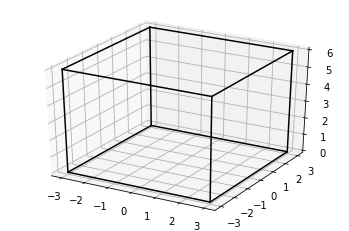

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pv.DrawCube(cube, ax)
plt.show()

2. הגדירו מצלמה בעלת אורך מוקד וגודל חיישן סטנדרטיים (חפשו באינטרנט מהם הפרמטרים הסטנדרטיים עבור עדשות של מצלמות DSLR)

In [9]:
focal_length = 35
sensor_size = 25
camera1 = Camera(focal_length, np.array([0, 0]), None, None, None, sensor_size)

3.  הגדירו תצלום אנכי שצולם עם המצלמה לעיל ונמצא מעל ראשית הצירים בעולם, ובגובה כלשהו (למשל, 10 מ')

In [10]:
omega = 0
phi = 0
kappa = 0
Z = 50

img1 = SingleImage(camera1)
img1.exteriorOrientationParameters = np.array([[0, 0, Z, omega, phi, kappa]])

4.  ציירו את המצלמה, עם מישור התצלום, והקוביה באותו איור. ודאו שכל הקוביה מצולמת ושכקנה המידה הגיוני וניתן לעבודה. אם לא, שנו את הפרמטרים עד שתתקבל תוצאה הגיונית.  

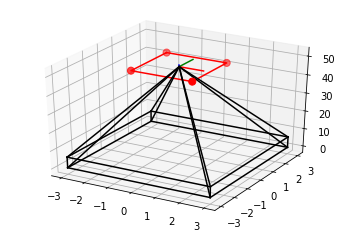

In [11]:
# scale of image frame in the plot
scale = 100

# draw image frame in world system
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pv.DrawCube(cube, ax)
img1.drawSingleImage(cube, scale, ax)
plt.show()

5. ציירו את ההטלה של הקוביה על התצלום.

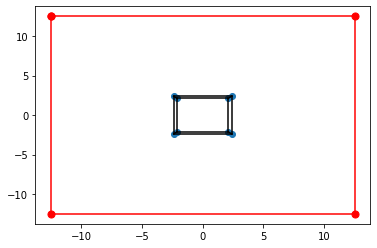

In [12]:
image1Points = img1.GroundToImage(cube)
plt.figure()
pv.drawImageFrame2D(img1.camera.sensorSize, img1.camera.sensorSize)
pv.DrawCube2D(image1Points, plt.gca())
plt.scatter(image1Points[:, 0], image1Points[:, 1])

6. שנו את הפרמטרים כך שתוכלו לענות על השאלות בתחילת הפרק. 

*הראו את הניסויים השונים שאתם עושים על מנת להגיע למסקנות הוסיפו כמה שורות קוד שתרצו*

1. איך משפיע אורך המוקד על התמונה המתקבלת? האם היא מעוותת יותר ככל שאורך המוקד גדל? האם פחות?


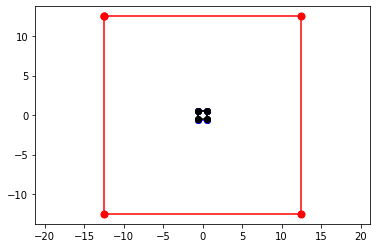

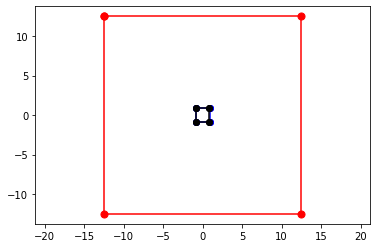

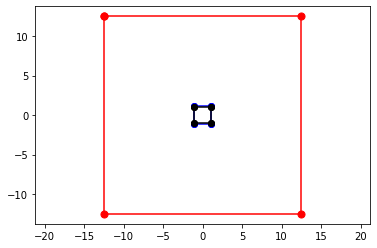

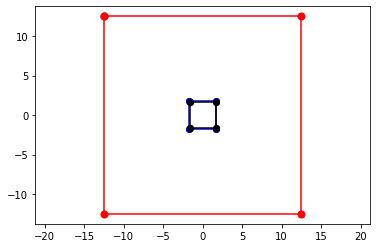

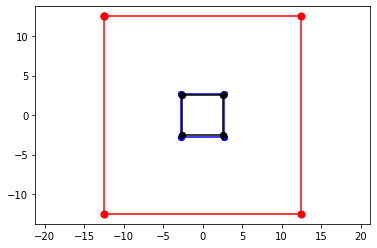

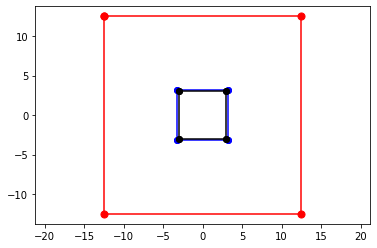

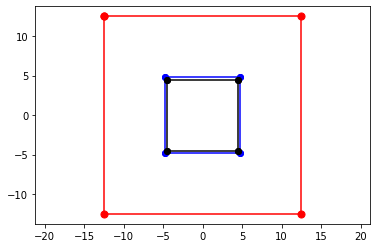

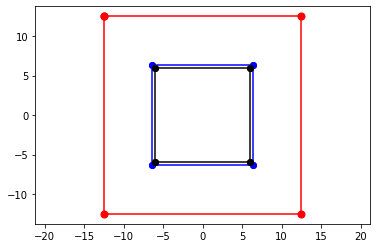

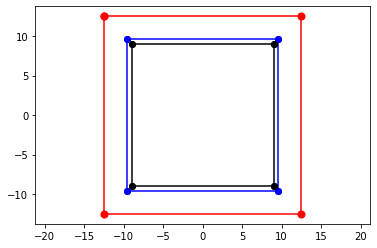

In [13]:
focalLength_array = np.array([18,28,35,55,85,100,150,200,300])

for f in focalLength_array:
    # define camera
    camera2 = Camera(f, np.array([0, 0]), None, None, None, sensor_size)
    # define image
    img2 = SingleImage(camera2)
    img2.exteriorOrientationParameters = np.array([[0, 0, 100, omega, phi, kappa]])

    plt.figure()
    pv.drawImageFrame2D(img2.camera.sensorSize, img2.camera.sensorSize)
    # calculate the projection of the cube in the camera system
    imagePoints = img2.GroundToImage(cube)
    x_imgPoints = imagePoints[:, 0]
    y_imgPoints = imagePoints[:, 1]
    # draw the top of the cube projection
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 1, 4, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 4, 5, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 5, 8, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 8, 1, 'b-o')
    # draw the base of the cube projection
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 2, 3, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 3, 6, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 6, 7, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 7, 2, 'k-o')
    plt.axis('equal')

ככל שאורך המוקד גדל האובייקט יופיע גדול יותר בתמונה ופחות מעוות. להבדל בעיוות ניתן לשים לב כשמשווים לאותו קנ"מ בסעיף הבא

2. איך ישפיע המרחק של האובייקט מהמצלמה? 

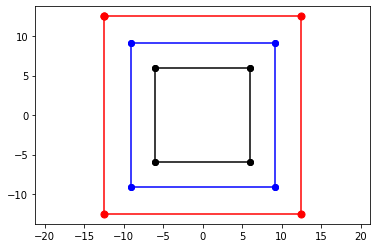

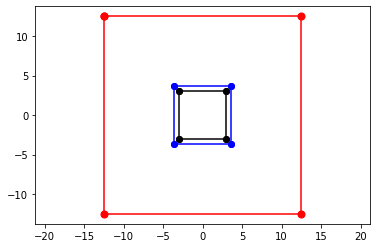

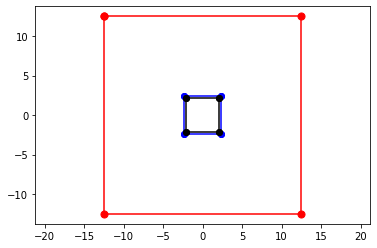

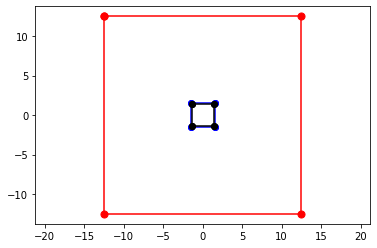

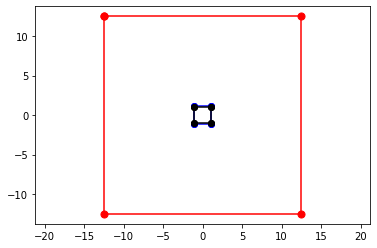

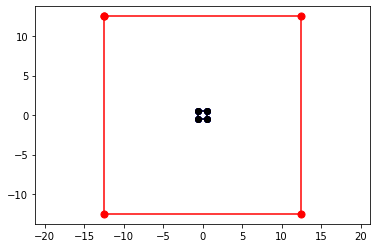

In [14]:
focal_length2 = 35
Z0_array = np.array([17.5,35,50,75,100,200])
for Z0 in Z0_array:
    # define camera
    camera3 = Camera(focal_length2, np.array([0, 0]), None, None, None, sensor_size)
    # define image
    img3 = SingleImage(camera3)
    img3.exteriorOrientationParameters = np.array([[0, 0, Z0, omega, phi, kappa]])

    plt.figure()
    pv.drawImageFrame2D(img3.camera.sensorSize, img3.camera.sensorSize)
    # calculate the projection of the cube in the camera system
    imagePoints = img3.GroundToImage(cube)
    x_imgPoints = imagePoints[:, 0]
    y_imgPoints = imagePoints[:, 1]
    # draw the top of the cube projection
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 1, 4, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 4, 5, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 5, 8, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 8, 1, 'b-o')
    # draw the base of the cube projection
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 2, 3, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 3, 6, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 6, 7, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 7, 2, 'k-o')
    plt.axis('equal')

ככל שהאובייקט רחוק יותר הוא קטן יותר בתמונה ופחות מעוות (השפעת הפרפקטיבה פוחתת)

3. מה יקרה במצב בו גם אורך המוקד גדול וגם האובייקט רחוק מאוד מהמצלמה?


(-13.761616150825944,
 13.761616150825942,
 -13.767885795145908,
 13.767885795145906)

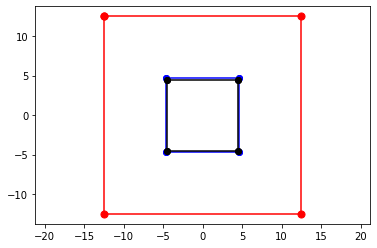

In [15]:
focal_length3 = 300
ZO_3 = 200
# define camera
camera4 = Camera(focal_length3, np.array([0, 0]), None, None, None, sensor_size)
# define image
img4 = SingleImage(camera4)
img4.exteriorOrientationParameters = np.array([[0, 0, ZO_3, omega, phi, kappa]])

plt.figure()
pv.drawImageFrame2D(img4.camera.sensorSize, img4.camera.sensorSize)
# calculate the projection of the cube in the camera system
imagePoints = img4.GroundToImage(cube)
x_imgPoints = imagePoints[:, 0]
y_imgPoints = imagePoints[:, 1]
# draw the top of the cube projection
pv.connect2Dpoints(x_imgPoints, y_imgPoints, 1, 4, 'b-o')
pv.connect2Dpoints(x_imgPoints, y_imgPoints, 4, 5, 'b-o')
pv.connect2Dpoints(x_imgPoints, y_imgPoints, 5, 8, 'b-o')
pv.connect2Dpoints(x_imgPoints, y_imgPoints, 8, 1, 'b-o')
# draw the base of the cube projection
pv.connect2Dpoints(x_imgPoints, y_imgPoints, 2, 3, 'k-o')
pv.connect2Dpoints(x_imgPoints, y_imgPoints, 3, 6, 'k-o')
pv.connect2Dpoints(x_imgPoints, y_imgPoints, 6, 7, 'k-o')
pv.connect2Dpoints(x_imgPoints, y_imgPoints, 7, 2, 'k-o')
plt.axis('equal')

קיבלנו את האובייקט גדול ולא מעוות.
מכיוון שלהגדלת המרחק יש השפעה הפוכה על גודל האובייקט מהגדלת אורך המוקד והשפעה דומה מבחינת הפחתת העיוות הפרספקטיבי. כאשר אורך המוקד גדול והאובייקט רחוק אנחנו יכולים לקבל את האובייקט גם ברזולוציה גבוהה וגם עם עיוות נמוך. 

4. איך ישפיע סיבוב ב $\kappa$ על התמונה המתקבלת?

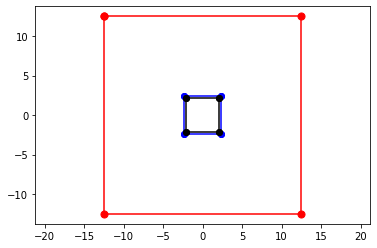

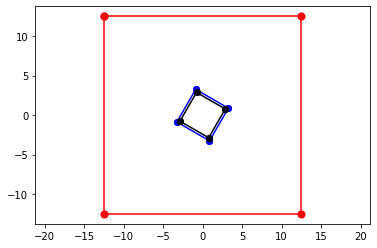

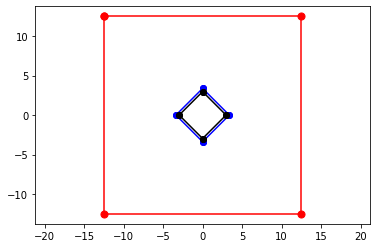

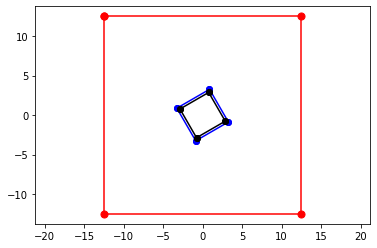

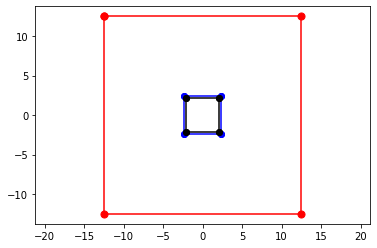

In [16]:
kappa_array = np.radians(np.array([0,30,45,60,90]))
for k in kappa_array:
    # define camera
    camera5 = Camera(35, np.array([0, 0]), None, None, None, sensor_size)
    # define image
    img5 = SingleImage(camera5)
    img5.exteriorOrientationParameters = np.array([[0, 0, 50, omega, phi, k]])

    plt.figure()
    pv.drawImageFrame2D(img5.camera.sensorSize, img5.camera.sensorSize)
    # calculate the projection of the cube in the camera system
    imagePoints = img5.GroundToImage(cube)
    x_imgPoints = imagePoints[:, 0]
    y_imgPoints = imagePoints[:, 1]
    # draw the top of the cube projection
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 1, 4, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 4, 5, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 5, 8, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 8, 1, 'b-o')
    # draw the base of the cube projection
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 2, 3, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 3, 6, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 6, 7, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 7, 2, 'k-o')
    plt.axis('equal')

האובייקט נראה מסובב אך אין שוני בעיוות.

5. איך ישפיע סיבוב ב-$\varphi$ על התמונה המתקבלת?

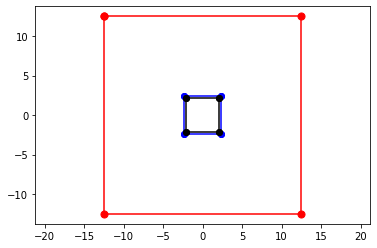

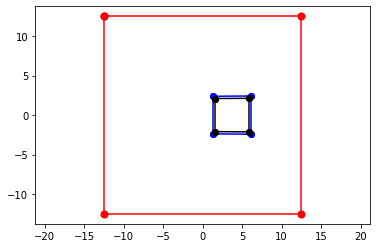

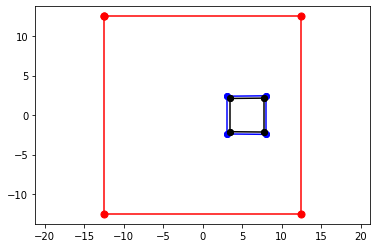

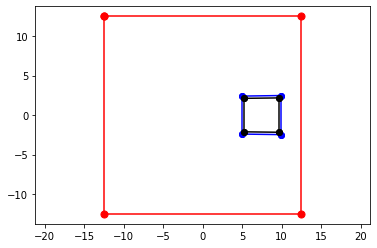

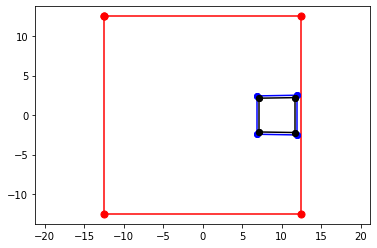

In [17]:
phi_array = np.radians(np.array([0,30,45,60,75])/5)
for p in phi_array:
    # define camera
    camera6 = Camera(35, np.array([0, 0]), None, None, None, sensor_size)
    # define image
    img6 = SingleImage(camera6)
    img6.exteriorOrientationParameters = np.array([[0, 0, 50, omega, p, kappa]])

    plt.figure()
    pv.drawImageFrame2D(img6.camera.sensorSize, img6.camera.sensorSize)
    # calculate the projection of the cube in the camera system
    imagePoints = img6.GroundToImage(cube)
    x_imgPoints = imagePoints[:, 0]
    y_imgPoints = imagePoints[:, 1]
    # draw the top of the cube projection
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 1, 4, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 4, 5, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 5, 8, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 8, 1, 'b-o')
    # draw the base of the cube projection
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 2, 3, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 3, 6, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 6, 7, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 7, 2, 'k-o')
    plt.axis('equal')

הסיבוב סביב פי גורם לעיוות שמשמר מקבילות לאורך ציר x 
ולא משמר יחסי גודל

6. איך ישפיע סיבוב גם סביב ציר X וגם סביב ציר Y של המצלמה על התמונה המתקבלת?

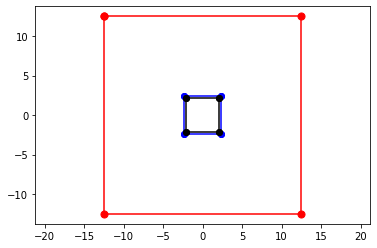

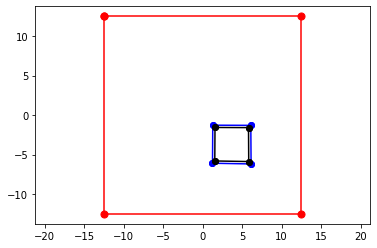

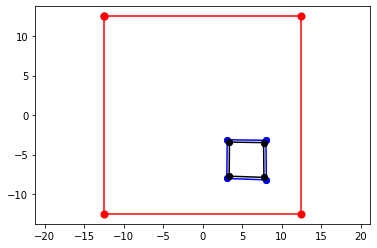

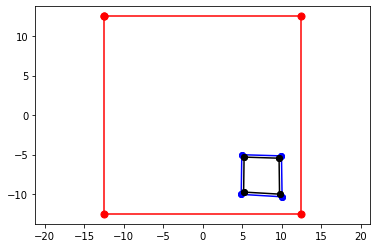

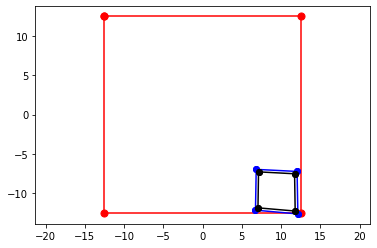

In [18]:
omega_array = np.radians(np.array([0,30,45,60,75])/5)
phi_array = np.radians(np.array([0,30,45,60,75])/5)
for i,p in enumerate(phi_array):
    # define camera
    camera7 = Camera(35, np.array([0, 0]), None, None, None, sensor_size)
    # define image
    img7 = SingleImage(camera7)
    img7.exteriorOrientationParameters = np.array([[0, 0, 50, omega_array[i], p, kappa]])

    plt.figure()
    pv.drawImageFrame2D(img7.camera.sensorSize, img7.camera.sensorSize)
    # calculate the projection of the cube in the camera system
    imagePoints = img7.GroundToImage(cube)
    x_imgPoints = imagePoints[:, 0]
    y_imgPoints = imagePoints[:, 1]
    # draw the top of the cube projection
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 1, 4, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 4, 5, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 5, 8, 'b-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 8, 1, 'b-o')
    # draw the base of the cube projection
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 2, 3, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 3, 6, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 6, 7, 'k-o')
    pv.connect2Dpoints(x_imgPoints, y_imgPoints, 7, 2, 'k-o')
    plt.axis('equal')

נגרם עיוות שלא משמר בכלל מקבילות 
ולא משמר יחסי גודל

## חלק ג' - השפעת קונפיגורציית תצלומים על שחזור מודל

1. כיצד ישתנה דיוק המודל המשוחזר בשינוי גודל הבסיס?
2. כיצד ישתנה דיוק המודל המשוחזר אם תמונה אחת מסובבת? האם יהיה הבדל בין סיבוב של תמונה אחת לעומת השניה? 
3. כיצד ישפיע רעש מדידה של נקודות בעולם על שחזור המודל? 
4. כיצד ישפיע רעש מדידה של נקודות בתצלום על שחזור המודל?

### בניית הנתונים הסינטטיים

השתמשו בקוביה, במצלמה ובתצלום שבניתם בפרק הקודם.

1. הגדירו מצלמה שניה בעלת אורך מוקד וגודל חיישן דומים למצלמה הראשונה 

In [19]:
camera2 = Camera(focal_length, np.array([0, 0]), None, None, None, sensor_size)

2.  הגדירו תצלום אנכי שצולם עם המצלמה השניה ונמצא במרחק כלשהו מהמצלמה הראשונה בעולם ובאותו הגובה.

In [20]:
base = 10
omega = 0
phi = 0
kappa = 0
Z = 50
img2 = SingleImage(camera2)
img2.exteriorOrientationParameters = np.array([[base, 0, Z, omega, phi, kappa]])

4.  ציירו את המצלמות, עם מישורי התצלום, והקוביה באותו איור. ודאו שכל הקוביה מצולמת בשני התצלומים ושכקנה המידה הגיוני וניתן לעבודה. אם לא, שנו את הפרמטרים עד שתתקבל תוצאה הגיונית.  

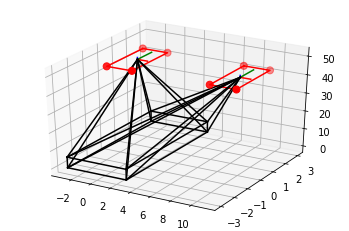

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pv.DrawCube(cube, ax)
img1.drawSingleImage(cube, scale, ax)
img2.drawSingleImage(cube, scale, ax)
plt.show()

5. ציירו את ההטלה של הקוביה על כל אחד מהתצלומים.

(-13.775555531817076,
 13.775555531817078,
 -13.767885795145908,
 13.767885795145906)

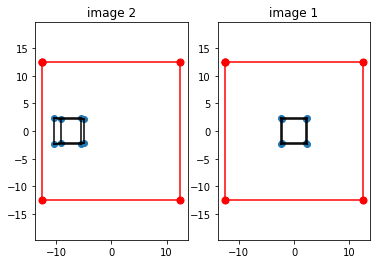

In [22]:
image2Points = img2.GroundToImage(cube)
plt.figure()
plt.subplot(121)
pv.drawImageFrame2D(img2.camera.sensorSize, img2.camera.sensorSize)
plt.scatter(image2Points[:, 0], image2Points[:, 1])
# image2Points = np.hstack((image2Points,np.ones((image2Points.shape[0],1))*Z))
pv.DrawCube2D(image2Points, plt.gca())
plt.title('image 2')
plt.axis('equal')

plt.subplot(122)
pv.drawImageFrame2D(img1.camera.sensorSize, img1.camera.sensorSize)
pv.DrawCube2D(image1Points, plt.gca())
plt.scatter(image1Points[:, 0], image1Points[:, 1])
plt.title('image 1')
plt.axis('equal')

6. בצעו חיתוך קדימה והשוו את הקואורידנטות המתקבלות עבור הקוביה בעולם עם הקואורדינטות האמיתיות שלה (אלו שאתם בחרתם). 

In [23]:
from ImagePair import ImagePair

imgPair = ImagePair(img1, img2)

In [24]:
calcCube, sigma = imgPair.geometricIntersection(image1Points, image2Points, 'world')
# difference from original coordinates
print(np.abs(calcCube - cube))

[[8.88178420e-16 4.44089210e-16 1.42108547e-14]
 [1.33226763e-15 0.00000000e+00 0.00000000e+00]
 [1.33226763e-15 0.00000000e+00 0.00000000e+00]
 [8.88178420e-16 4.44089210e-16 1.42108547e-14]
 [1.77635684e-15 0.00000000e+00 2.84217094e-14]
 [3.55271368e-15 4.44089210e-16 1.42108547e-14]
 [3.55271368e-15 4.44089210e-16 1.42108547e-14]
 [1.77635684e-15 0.00000000e+00 2.84217094e-14]]


7. שנו את הפרמטרים כך שתוכלו לענות על השאלות בתחילת הפרק. 

*הראו את הניסויים השונים שאתם עושים על מנת להגיע למסקנות הוסיפו כמה שורות קוד שתרצו*

In [31]:
# def runTest(coords,base=10,Z=50,omega1=0,phi1=0,kappa1=0,
#             omega2=0,phi2=0,kappa2=0, noiseSizeGround=0, noiseSizeSamples=0):
#     """
#     Runs test by changing parameters
#     """

#     img1.exteriorOrientationParameters = np.array([[0, 0, Z, omega1, phi1, kappa1]])
#     img2.exteriorOrientationParameters = np.array([[base, 0, Z, omega2, phi2, kappa2]])
#     noisyCoords = coords.copy()
#     # generate ground points
#     if noiseSizeGround > 0:
#         noise = np.random.normal(0, noiseSizeGround, coords.shape)
#         noisyCoords += noise
#     # generate samples
#     image1Points = img1.GroundToImage(noisyCoords)
#     image2Points = img2.GroundToImage(noisyCoords)
#     if noiseSizeSamples > 0:
#         noise = np.random.normal(0, noiseSizeSamples, image1Points.shape)
#         image1Points += noise
#         image2Points += noise
#     # check if still in the image
#     if np.max(np.abs(image1Points)) > sensor_size / 2 or np.max(np.abs(image2Points)) > sensor_size / 2:
#         print("out of image")
#         return None, None
#     imgPair = ImagePair(img1, img2)
#     # forward intersection
#     calcCoords, sigma = imgPair.geometricIntersection(image1Points, image2Points, 'world')
#     diff = np.abs(calcCoords-coords)
from lab1_main import runTest

1. כיצד ישתנה דיוק המודל המשוחזר בשינוי גודל הבסיס?


out of image


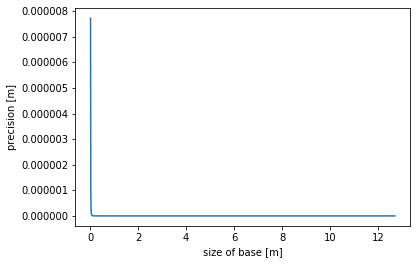

In [63]:
rangeArray = np.arange(0.01, 50, 0.01)
precision = 0
for i, base in enumerate(rangeArray):
    sigma,diff = runTest(cube,base=base)
    if sigma is None:
        i -= 1
        break
    if i == 0:
        precision = np.linalg.norm(sigma)
        diffNorm = np.linalg.norm(diff)
    else:
        precision = np.vstack((precision, np.linalg.norm(sigma)))
        diffNorm = np.vstack((diffNorm, np.linalg.norm(diff)))
plt.figure()
plt.subplot(111)
plt.xlabel('size of base [m]')
plt.ylabel('precision [m]')
plt.plot(rangeArray[:i + 1], precision)

ככל שהבסיס גדל הדיוק גדל (ניתן לראות שהדיוק משתפר אקספוננציאלית)

2. כיצד ישתנה דיוק המודל המשוחזר אם תמונה אחת מסובבת? האם יהיה הבדל בין סיבוב של תמונה אחת לעומת השניה? 


out of image


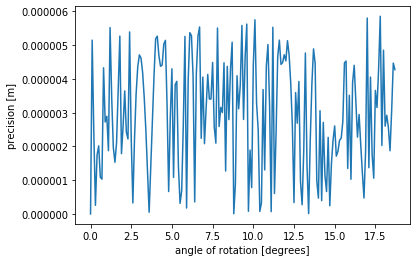

In [61]:
# change img1 phi angle
rangeArray = np.radians(np.arange(0, 70, 0.1))
for i, phi in enumerate(rangeArray):
    sigma,diff = runTest(cube,phi1=phi,Z=200)
    if sigma is None:
        i -= 1
        break
    if i == 0:
        precision = np.linalg.norm(sigma)
        diffNorm = np.linalg.norm(diff)
    else:
        precision = np.vstack((precision, np.linalg.norm(sigma)))
        diffNorm = np.vstack((diffNorm, np.linalg.norm(diff)))
plt.figure()
plt.subplot(111)
plt.xlabel('angle of rotation [degrees]')
plt.ylabel('precision [m]')
plt.plot(np.degrees(rangeArray[:i + 1]), precision)


out of image


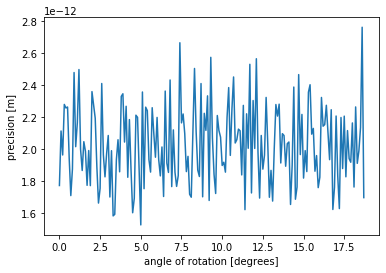

In [60]:
# change img1 omega angle
rangeArray = np.radians(np.arange(0, 70, 0.1))
for i, omega in enumerate(rangeArray):
    sigma,diff = runTest(cube,omega1=omega,Z=200)
    if sigma is None:
        i -= 1
        break
    if i == 0:
        precision = np.linalg.norm(sigma)
        diffNorm = np.linalg.norm(diff)
    else:
        precision = np.vstack((precision, np.linalg.norm(sigma)))
        diffNorm = np.vstack((diffNorm, np.linalg.norm(diff)))
plt.figure()
plt.subplot(111)
plt.xlabel('angle of rotation [degrees]')
plt.ylabel('precision [m]')
plt.plot(np.degrees(rangeArray[:i + 1]), precision)

out of image


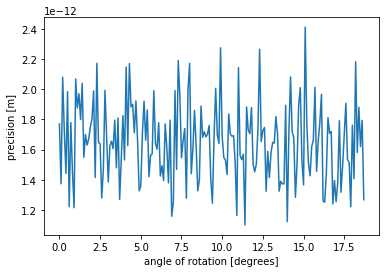

In [59]:
# change img2 omega angle
rangeArray = np.radians(np.arange(0, 70, 0.1))
for i, omega in enumerate(rangeArray):
    sigma,diff = runTest(cube,omega2=omega,Z=200)
    if sigma is None:
        i -= 1
        break
    if i == 0:
        precision = np.linalg.norm(sigma)
        diffNorm = np.linalg.norm(diff)
    else:
        precision = np.vstack((precision, np.linalg.norm(sigma)))
        diffNorm = np.vstack((diffNorm, np.linalg.norm(diff)))
plt.figure()
plt.subplot(111)
plt.xlabel('angle of rotation [degrees]')
plt.ylabel('precision [m]')
plt.plot(np.degrees(rangeArray[:i + 1]), precision)

ניתן לראות שהסיבוב לא משפיע על הדיוק במגמה מסוימת ושאין משמעות לאיזו תמונה מסובבים. (התוצאות רועשות)

3. כיצד ישפיע רעש מדידה של נקודות בעולם על שחזור המודל? 

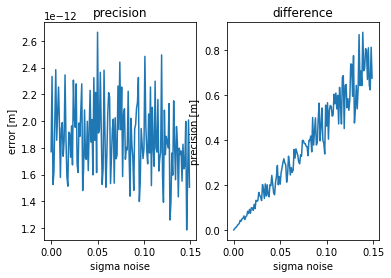

In [56]:
# add noise to ground points
rangeArray = np.arange(0, 0.15, 0.001)
for i, noiseSize in enumerate(rangeArray):
    sigma,diff = runTest(cube,noiseSizeGround=noiseSize,Z=200)
    if sigma is None:
        i -= 1
        break
    if i == 0:
        precision = np.linalg.norm(sigma)
        diffNorm = np.linalg.norm(diff)
    else:
        precision = np.vstack((precision, np.linalg.norm(sigma)))
        diffNorm = np.vstack((diffNorm, np.linalg.norm(diff)))

plt.figure()
plt.subplot(121)
plt.title('precision')
plt.xlabel('sigma noise')
plt.ylabel('error [m]')
plt.plot(rangeArray[:i + 1], precision)
plt.subplot(122)
plt.title('difference')
plt.xlabel('sigma noise')
plt.ylabel('precision [m]')
plt.plot(rangeArray[:i + 1], diffNorm)

ניתן לראות כצפוי שאין הבדל בדיוק אך ככל שהרעש גדל השגיאה מהקואורדינטות האמיתיות גדלה

4. כיצד ישפיע רעש מדידה של נקודות בתצלום על שחזור המודל?

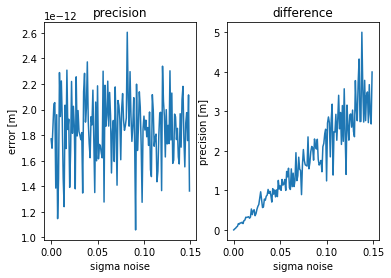

In [57]:
# add noise to sampled points
rangeArray = np.arange(0, 0.15, 0.001)
for i, noiseSize in enumerate(rangeArray):
    sigma,diff = runTest(cube,noiseSizeSamples=noiseSize,Z=200)
    if sigma is None:
        i -= 1
        break
    if i == 0:
        precision = np.linalg.norm(sigma)
        diffNorm = np.linalg.norm(diff)
    else:
        precision = np.vstack((precision, np.linalg.norm(sigma)))
        diffNorm = np.vstack((diffNorm, np.linalg.norm(diff)))

plt.figure()
plt.subplot(121)
plt.title('precision')
plt.xlabel('sigma noise')
plt.ylabel('error [m]')
plt.plot(rangeArray[:i + 1], precision)
plt.subplot(122)
plt.title('difference')
plt.xlabel('sigma noise')
plt.ylabel('precision [m]')
plt.plot(rangeArray[:i + 1], diffNorm)

ניתן לראות שהרעש בדגימות משפיע בצורה יותר משמעותית על השגיאה 